This is a IPython notebook that contains both the answers and the corresponding code for the problems in Test Exercise 1. All code is written is in Python 3 and the text is generated using Markdown.

In [1]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Importing the dataset
data = pd.read_excel('_689829b5c78b9b71bd384ed8fb8714c1_TestExer-1-sales-round1.xls')
data.head()

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


In [3]:
# Summary of the data
data.describe()

,Observation,Advertising,Sales
count,20.00000,20.000000,20.000000
mean,10.50000,10.250000,26.300000
std,5.91608,2.917732,5.759203
min,1.00000,6.000000,23.000000
25%,5.75000,8.000000,24.000000
50%,10.50000,11.000000,25.000000
75%,15.25000,12.000000,26.250000
max,20.00000,16.000000,50.000000


## Part (a)

The scatter plot of the data is generated using the code snippet below.  
The regression line would not be accurate due to the outlier present at the data point (6,50). The outlier would create a single high residual value which would violate assumption A3. The regression line thus generated would not fit well to the data and have lower Variance Explained ($R^2$), lower t-value for $b$, and a large 95% confidence interval for $b$.

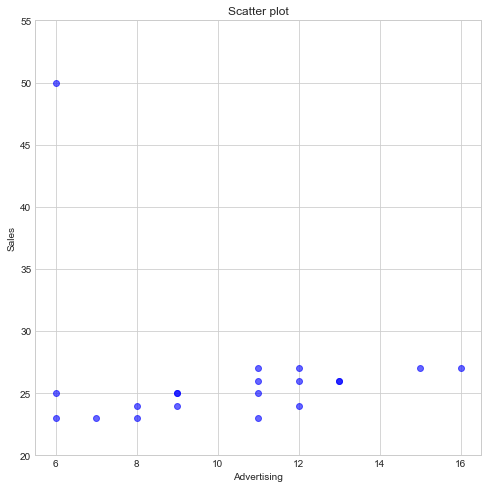

In [4]:
plt.figure(figsize=(8,8))
plt.title('Scatter plot')
plt.scatter(data['Advertising'], data['Sales'], c='b', alpha=0.6)
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.ylim([20,55])
plt.show()

## Part (b)

In [5]:
x = data['Advertising']
y = data['Sales']
mean_x = x.mean()
mean_y = y.mean()

In [6]:
b = (np.dot(np.transpose(x - mean_x),(y - mean_y)))/sum((x - mean_x)**2)

In [7]:
a = mean_y - b*mean_x

In [8]:
print("a = {}\nb = {}".format(a,b))

a = 29.626893353941266
b = -0.3245749613601236


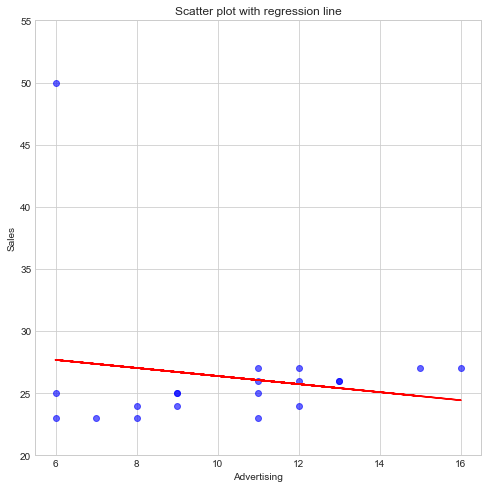

In [9]:
plt.figure(figsize=(8,8))
plt.title('Scatter plot with regression line')
plt.scatter(x, y, c='b', alpha=0.6)
plt.plot(x, a+b*x, '-r')
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.ylim([20,55])
plt.show()

In [10]:
e = (y - mean_y) - b*(x - mean_x)
R2 = 1 - sum(e**2)/sum((y - mean_y)**2)

In [11]:
print("R squared = {}".format(R2))

R squared = 0.027039329532539513


In [12]:
s2 = sum(e**2)/(len(x)-2)
print("s^2 = {}".format(s2))

s^2 = 34.06443414047742


In [13]:
s_b = (s2/sum((x - mean_x)**2))**0.5
print("s_b = {}".format(s_b))

s_b = 0.45891097580291074


In [14]:
# t-value of b
t_b = b/s_b
print("t_b = {}".format(t_b))

t_b = -0.7072721692747644


In [15]:
print("Approx 95% confidence interval for b is [{},{}]".format(b - 2*s_b, b + 2*s_b))

Approx 95% confidence interval for b is [-1.2423969129659451,0.5932469902456978]


From the above calculations,  
$a = 29.627$  
$b = -0.325$  
$R^2 = 0.027$  
t-value for $b = -0.707$  
standard error for $b = 0.459$  
$b$ is close to $0$. It is evident from its standard error, and the low t-value of $b$ and hence we cannot not reject the null hypothesis ($H0$) that $\beta = 0$.

## Part (c)

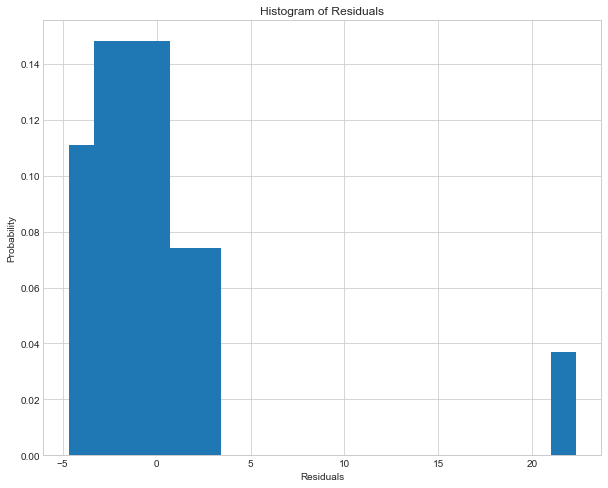

In [16]:
plt.figure(figsize=(10,8))
plt.title('Histogram of Residuals')
plt.hist(e,normed=True,bins=20)
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.show()

In [17]:
print("Mean: {}\nStd dev: {}\nSkewness: {}\nKurtosis: {}".format(e.mean(), e.std(), skew(e), kurtosis(e)))

Mean: -7.327471962526033e-16
Std dev: 5.680807089288938
Skewness: 3.178012049426174
Kurtosis: 10.282601127554958


Observing the high value for skewness (>0), and high value for kurtosis (>3) it can be concluded that the histogram of the residuals does't follow a normal distribution. 

## Part (d)

To get a more satisfactory model, we need to remove the outlier from the dataset. So, I removed the outlier present at (6,50). It is safe to do so because it is mentioned in the problem statement that for that particular observation the store was also open during the evenings of the week while for all other observations the store was not open during the evenings.

## Part (e)

In [18]:
#Removing the outlier from the dataset.
cleaned_data = data[data['Sales'] != 50]

In [19]:
# Recalculating the paramters and statistics
x = cleaned_data['Advertising']
y = cleaned_data['Sales']
mean_x = x.mean()
mean_y = y.mean()

In [20]:
b = (np.dot(np.transpose(x - mean_x),(y - mean_y)))/sum((x - mean_x)**2)

In [21]:
a = mean_y - b*mean_x

In [22]:
print("a = {}\nb = {}".format(a,b))

a = 21.125
b = 0.375


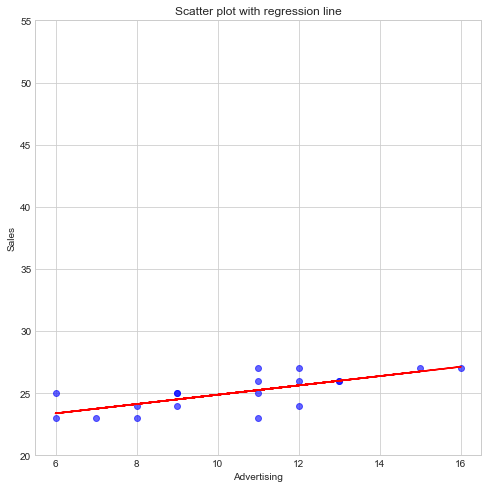

In [23]:
plt.figure(figsize=(8,8))
plt.title('Scatter plot with regression line')
plt.scatter(x, y, c='b', alpha=0.6)
plt.plot(x, a+b*x, '-r')
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.ylim([20,55])
plt.show()

In [24]:
e = (y - mean_y) - b*(x - mean_x)
R2 = 1 - sum(e**2)/sum((y - mean_y)**2)

In [25]:
print("R squared = {}".format(R2))

R squared = 0.5153716216216215


In [26]:
s2 = sum(e**2)/(len(x)-2)
print("s^2 = {}".format(s2))

s^2 = 1.1102941176470589


In [27]:
s_b = (s2/sum((x - mean_x)**2))**0.5
print("s_b = {}".format(s_b))

s_b = 0.0881964241412493


In [28]:
# t-value of b
t_b = b/s_b
print("t_b = {}".format(t_b))

t_b = 4.251873062329896


In [29]:
print("Approx 95% confidence interval for b is [{},{}]".format(b - 2*s_b, b + 2*s_b))

Approx 95% confidence interval for b is [0.1986071517175014,0.5513928482824986]


From the above calculations,  
$a = 21.125$  
$b = 0.375$  
$R^2 = 0.515$  
t-value for $b = 4.252$  
standard error for $b = 0.088$  
$b$ is significantly different from $0$ as it has a low standard error and high t-value (>2). So we can reject the null hypothesis ($H0$) that $\beta = 0$.

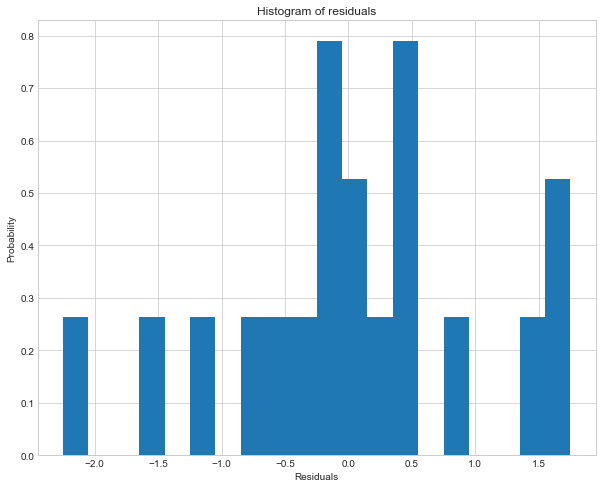

In [30]:
plt.figure(figsize=(10,8))
plt.title('Histogram of residuals')
plt.hist(e,normed=True,bins=20)
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.show()

In [31]:
print("Mean: {}\nStandard dev: {}\nSkewness: {}\nKurtosis: {}".format(e.mean(), e.std(), skew(e), kurtosis(e)))

Mean: -1.7763568394002505e-15
Standard dev: 1.024017143953709
Skewness: -0.2516569996892638
Kurtosis: -0.06689947809306629


The low values for mean (close to 0), skewness (close to 0), and kurtosis (between -3 and 3) suggest that the residuals follow a reasonable normal distribution.

## Part (f)

From the results obtained in Part (b) and Part (e) it can be concluded that to ensure that $b$ is accurate with $\beta$ it is important for the data distribution and the error terms ($\epsilon_i$) to follow the 7 statistical assumptions listed in Lecture 1.4. These assumptions help us to precisely define the statistical properties of the slope estimator $b$.  

In Part (a) an outlier violated assumptions A3 and A4 which led to a poor fit of the linear regression. Removing the outlier resulted in a much better fit of the linear regression to the data in Part (e). This helped me learn that it is important to handle outliers before performing linear regression on the data. The presence of outliers can significantly affect the estimation of parameters $a$ and $b$ and their accuracy with $\alpha$ and $\beta$.  

I also learned that the general steps to conclude that a dataset can be fit using a linear regression model. First, we need to generate the scatter plot of the data to visualize it. Then we could determine the values for $a$, $b$, and apply tests such as $R^2$, t-test for $b$, and standard dev for $b$ to determine the quality of the fit. Furthermore, we should also check the statistics of the residuals to check the validity of the assumptions behind the linear regression model. If all the conditions are fulfilled, then we can conclude that the dataset can be fit using a linear regression model.